In [109]:
from BiGAN import Generator, Discriminator, Encoder, sample
from LS_GAN import Generator as g, Discriminator as d, sample

from matplotlib import pyplot as plt
import torch
from torch.nn import Sequential
from torchvision import transforms
from torchinfo import summary

rgb = transforms.ToPILImage()

In [111]:
# Initialization parameters
device = 'cuda:0'
datapath = '/home/adarsh/ADRL/datasets/bitmoji_faces'
modelpath = '/home/adarsh/ADRL/assignment_1/GAN/bi_gan/bi_gan13500.pt'
path = '/home/adarsh/ADRL/assignment_1/GAN/ls_gan/ls_gan9000.pt'

In [112]:
model = model = Sequential(d(), g()).to(device)

# Load Pretrained Model if avaliable in modelpath

model.load_state_dict(torch.load(path))


<All keys matched successfully>

In [113]:
from torchvision.utils import save_image
z = sample(64).to(device)
z = model[1](z).cpu()

save_image(z*0.5+0.5,
        f'/home/adarsh/ADRL/assignment_1/GAN/bi_gan/ls_gan_grid.png')

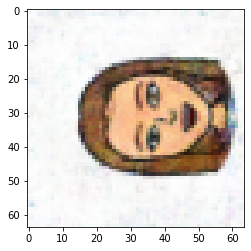

In [117]:
z = sample(1).to(device)
z_img = model[1](z).cpu()

plt.imshow(z_img.squeeze().detach().T*0.5+0.5)
plt.show()

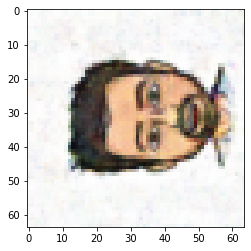

In [131]:
z1 = sample(1).to(device)
z1_img = model[1](z1).cpu()

plt.imshow(z1_img.squeeze().detach().T*0.5+0.5)
plt.show()

In [133]:
Z = torch.zeros((0, 100, 1, 1))
# Z = torch.cat((Z, z.cpu()))

Z_img = torch.zeros((0, 3, 64, 64))
# Z_img = torch.cat((Z_img, z_img.cpu()))

val = z1[:,99,:,:].item()
print(val)
for i in range(64):
    new_z = z1.clone().detach()
    to_add = i - 31
    new_z[:,99,:,:] = val + (to_add)*0.5
    print(new_z[:,99,:,:])
    new_z_img = model[1](new_z).cpu()
    Z = torch.cat((Z, new_z.cpu()))
    Z_img = torch.cat((Z_img, new_z_img))

print(Z_img.shape)
save_image(Z_img*0.5+0.5,
        f'/home/adarsh/ADRL/assignment_1/GAN/bi_gan/bi_gan_grid_traversal.png')

-1.6320143938064575
tensor([[[-17.1320]]], device='cuda:0')
tensor([[[-16.6320]]], device='cuda:0')
tensor([[[-16.1320]]], device='cuda:0')
tensor([[[-15.6320]]], device='cuda:0')
tensor([[[-15.1320]]], device='cuda:0')
tensor([[[-14.6320]]], device='cuda:0')
tensor([[[-14.1320]]], device='cuda:0')
tensor([[[-13.6320]]], device='cuda:0')
tensor([[[-13.1320]]], device='cuda:0')
tensor([[[-12.6320]]], device='cuda:0')
tensor([[[-12.1320]]], device='cuda:0')
tensor([[[-11.6320]]], device='cuda:0')
tensor([[[-11.1320]]], device='cuda:0')
tensor([[[-10.6320]]], device='cuda:0')
tensor([[[-10.1320]]], device='cuda:0')
tensor([[[-9.6320]]], device='cuda:0')
tensor([[[-9.1320]]], device='cuda:0')
tensor([[[-8.6320]]], device='cuda:0')
tensor([[[-8.1320]]], device='cuda:0')
tensor([[[-7.6320]]], device='cuda:0')
tensor([[[-7.1320]]], device='cuda:0')
tensor([[[-6.6320]]], device='cuda:0')
tensor([[[-6.1320]]], device='cuda:0')
tensor([[[-5.6320]]], device='cuda:0')
tensor([[[-5.1320]]], device=